In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_country = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/countries.csv")
df_currency = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/currency_details.csv")
df_trans = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/transactions.csv")
df_users = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/users.csv")


In [3]:
df_trans.head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID,AMOUNT_USD
0,GBP,4420,COMPLETED,2017-12-10 16:38:55.577,NaN,NLD,chip,3ff52b92-d416-4e22-8cad-018f500d4bbc,ATM,GAIA,367bf5f9-7cce-4683-90b9-d3c011bf4c87,3268.0
1,PLN,1500,COMPLETED,2017-12-10 16:37:24.792,point_of_interest,POL,manu,76cbaad3-4721-4a3b-92b9-3eb9e9319565,CARD_PAYMENT,GAIA,ff6802b9-360d-4efe-b09b-f99c6cac3383,NaN
2,GBP,191,COMPLETED,2017-12-10 16:37:16.234,airport,PRT,chip,7bcaa34e-b889-4582-9c29-0b3bab34fb8c,CARD_PAYMENT,GAIA,ddb4a930-7d8a-4f38-9079-ddc4b0db980e,141.0
3,GBP,10000,COMPLETED,2017-12-10 16:34:42.592,NaN,NaN,misc,b3a6762b-a940-4459-bb1d-8e28e151f901,TOPUP,HERA,080ef0be-850a-4f14-ab03-28ff68e6b797,7394.0
4,EUR,1159,COMPLETED,2017-12-10 16:34:17.88,NaN,FRA,manu,f5723f5e-5a00-4851-ae1d-5c11146aa491,CARD_PAYMENT,GAIA,bd13abac-4004-4c67-9bb7-90a42b027e82,977.0


In [4]:
df_users.describe()

,HAS_EMAIL,BIRTH_YEAR,FAILED_SIGN_IN_ATTEMPTS
count,9944.000000,9944.000000,9944.000000
mean,0.946702,1983.553298,0.008045
std,0.224639,11.350379,0.129737
min,0.000000,1927.000000,0.000000
25%,1.000000,1978.000000,0.000000
50%,1.000000,1986.000000,0.000000
75%,1.000000,1992.000000,0.000000
max,1.000000,2000.000000,6.000000


In [5]:
df_users.head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,ACTIVE,GB,1989,PASSED,0


<function matplotlib.pyplot.show(close=None, block=None)>

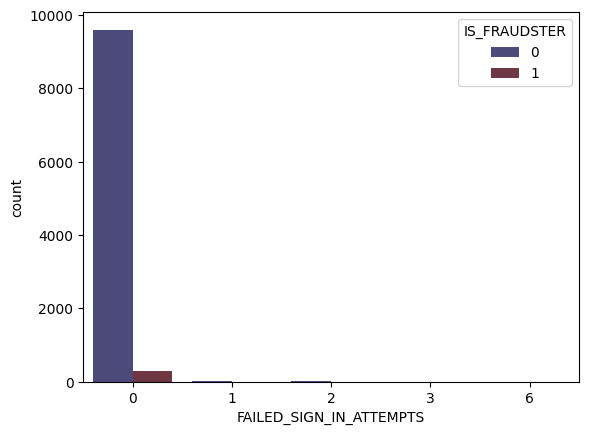

In [6]:
df_users['IS_FRAUDSTER'] = df_users['IS_FRAUDSTER'].astype(int)
df_users[['FAILED_SIGN_IN_ATTEMPTS','IS_FRAUDSTER']]

sns.countplot(data=df_users, x='FAILED_SIGN_IN_ATTEMPTS', hue='IS_FRAUDSTER', palette='icefire')
plt.show

In [7]:
df_UT = pd.merge(df_users,df_trans, left_on='ID',right_on='USER_ID',how='inner')
df_UT.drop(columns=['ID_y'],inplace=True)
df_UT.sample(5)

,ID_x,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE_x,STATE_x,COUNTRY,BIRTH_YEAR,KYC,...,AMOUNT,STATE_y,CREATED_DATE_y,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,AMOUNT_USD
379043,c533048a-fe9a-444a-8c4f-4f99063354c0,1,GB||JE||IM||GG,0,2018-05-25,2018-05-14 19:06:52.485000,ACTIVE,GB,1984,PASSED,...,4406,COMPLETED,2018-06-16 14:35:06.79,lodging,IRL,chip,c533048a-fe9a-444a-8c4f-4f99063354c0,CARD_PAYMENT,GAIA,3272.0
389128,0f52abdb-3a7f-4e77-bc1b-a80ac71e2e09,1,GB||JE||IM||GG,0,2018-09-20,2016-10-17 20:44:32.506000,ACTIVE,GB,1989,PASSED,...,15000,COMPLETED,2017-03-23 10:50:35.653,NaN,NaN,misc,0f52abdb-3a7f-4e77-bc1b-a80ac71e2e09,TOPUP,HERA,11205.0
491595,53b6be70-a26b-4429-b62a-6460839299e4,1,GB||JE||IM||GG,0,2018-09-20,2016-05-20 11:58:38.752000,ACTIVE,GB,1992,PASSED,...,1980,COMPLETED,2017-12-02 00:30:57.318,NaN,TUR,chip,53b6be70-a26b-4429-b62a-6460839299e4,CARD_PAYMENT,GAIA,1485.0
437885,4854814d-314c-40a7-a0d5-f3071b873162,1,FR,0,2018-09-20,2017-10-29 06:56:40.380000,ACTIVE,FR,1990,PASSED,...,6934,COMPLETED,2018-02-06 20:51:41.986,restaurant,USA,mags,4854814d-314c-40a7-a0d5-f3071b873162,CARD_PAYMENT,GAIA,5940.0
206675,03a42aa0-e53c-47dc-95c8-b11993235dd2,1,FR,0,2018-05-25,2018-04-02 14:24:34.306000,ACTIVE,FR,1992,PASSED,...,428,COMPLETED,2018-05-04 12:12:19.669,NaN,MEX,chip,03a42aa0-e53c-47dc-95c8-b11993235dd2,CARD_PAYMENT,GAIA,365.0


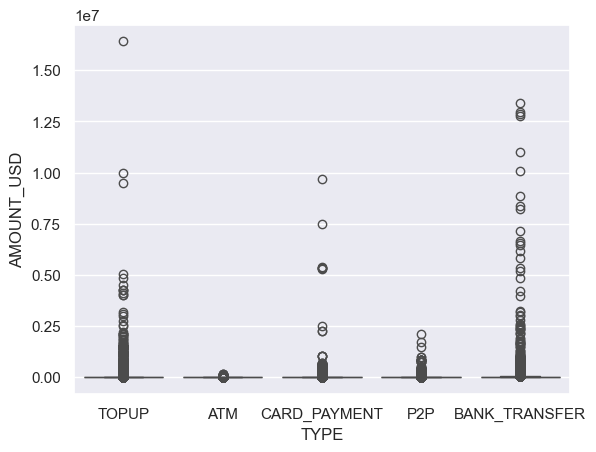

In [8]:
sns.set_theme(color_codes = True)
sns.boxplot(data=df_UT, x='TYPE', y='AMOUNT_USD')
plt.show()

C:\Users\jaadt\AppData\Local\Temp\ipykernel_10960\4021454919.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='TYPE', y='AMOUNT_USD', palette='pastel')


<Axes: xlabel='TYPE', ylabel='AMOUNT_USD'>

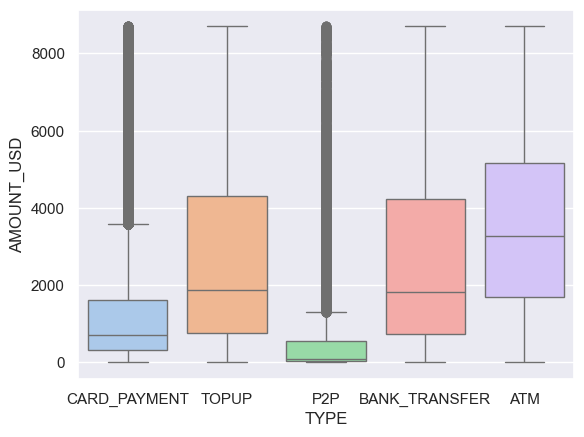

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr  
    fence_high = q3 + 1.5 * iqr
    # Filter rows 
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out

df_filtered = remove_outlier(df_UT, 'AMOUNT_USD')
sns.boxplot(data=df_filtered, x='TYPE', y='AMOUNT_USD', palette='pastel')

<Axes: xlabel='TYPE', ylabel='count'>

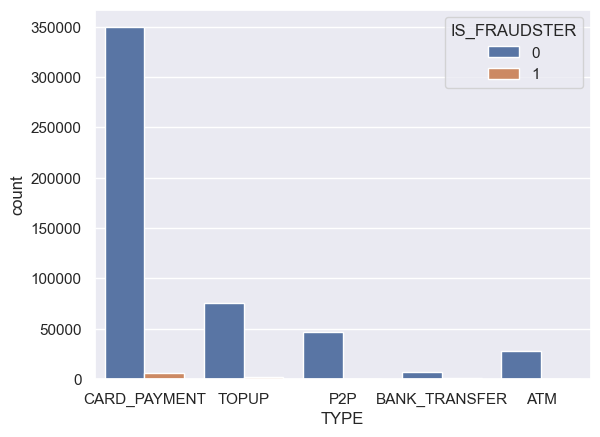

In [17]:
sns.countplot(data=df_filtered, x='TYPE', hue='IS_FRAUDSTER')

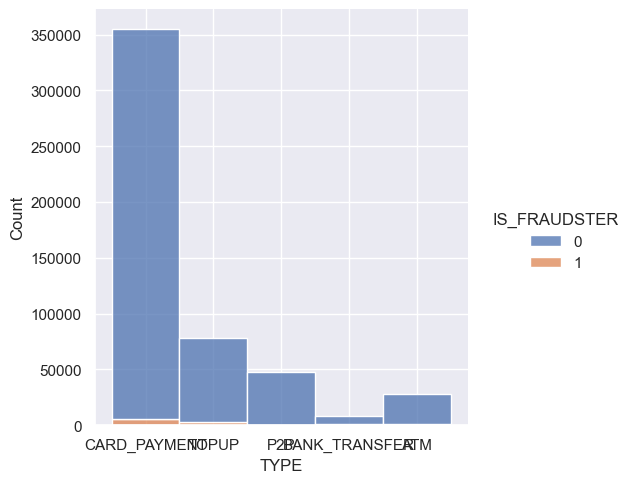

In [20]:
sns.displot(data= df_filtered, x="TYPE", hue= "IS_FRAUDSTER", multiple ="stack")

array([[<Axes: title={'center': 'BIRTH_YEAR'}>]], dtype=object)

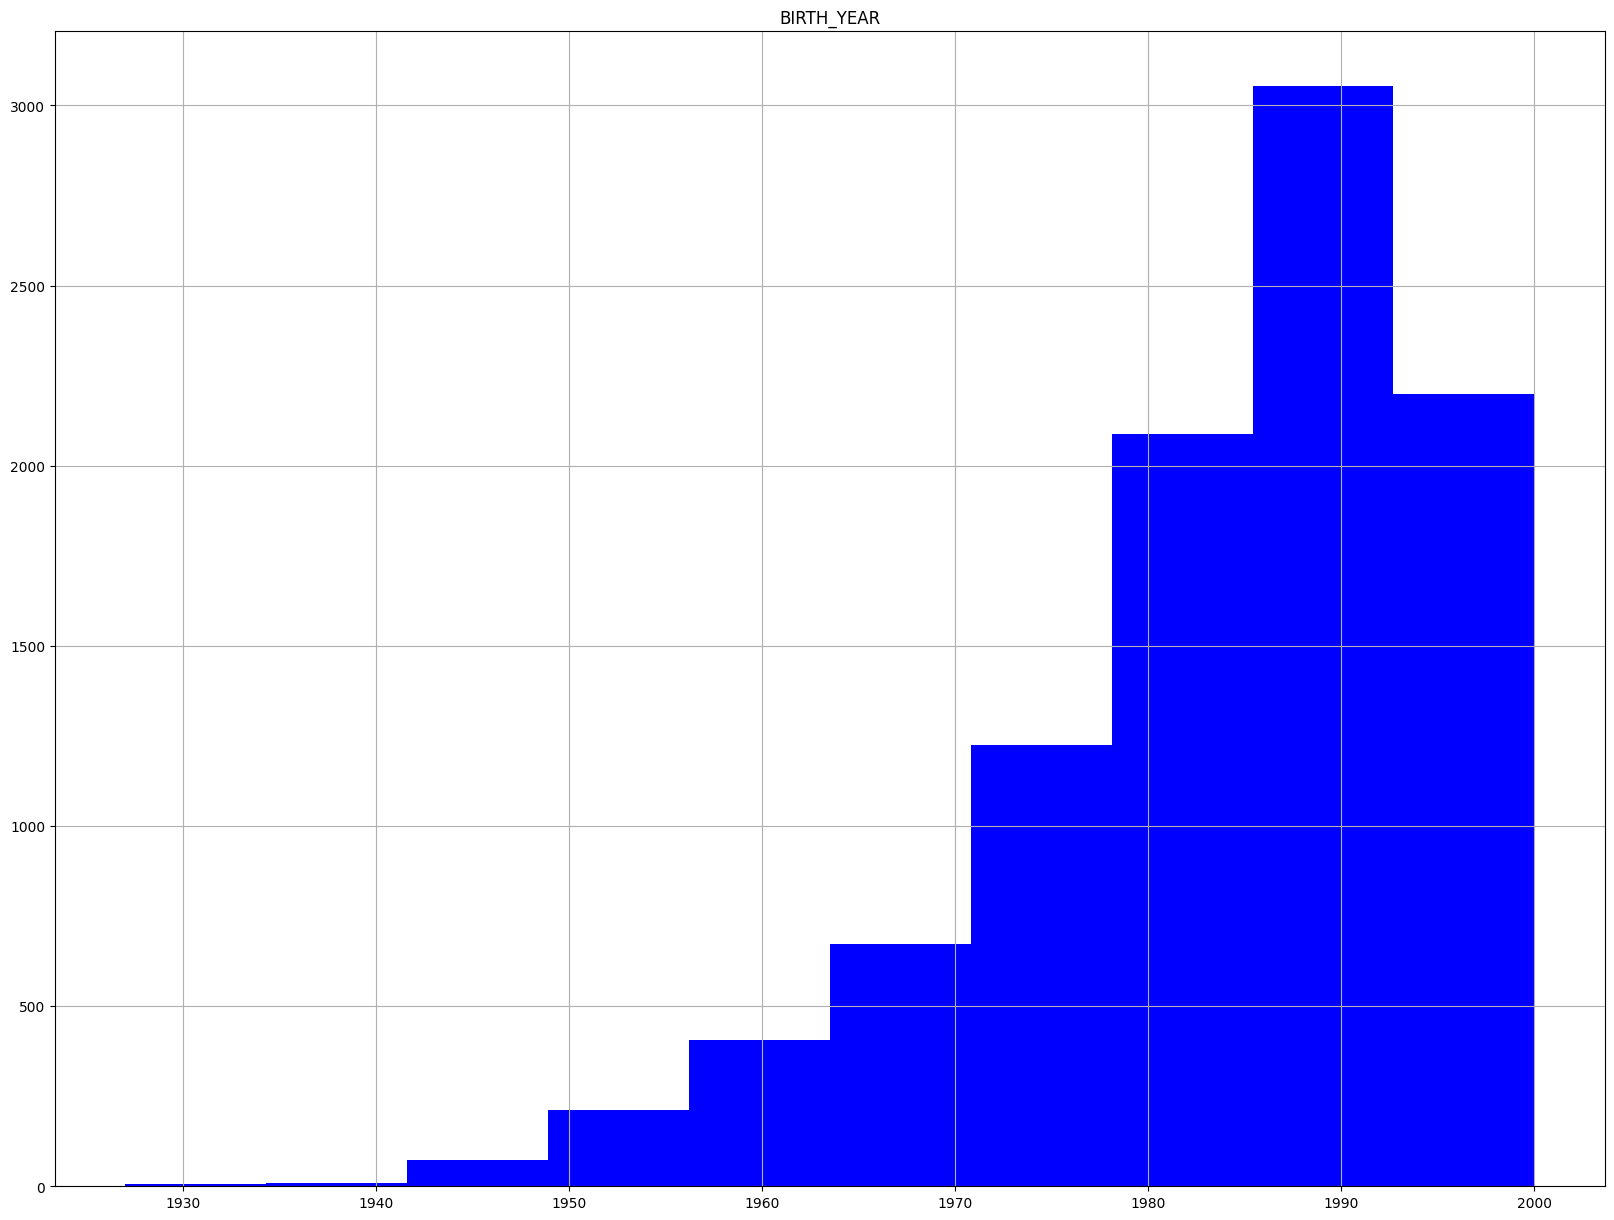

In [9]:
df_users[['BIRTH_YEAR','STATE']].hist(figsize=(20,15),color = "blue")

In [17]:
df_tu = pd.concat([df_users,df_trans],axis= 1)
df_tu = df_tu.fillna(value=0)


ValueError: could not convert string to float: '1872820f-e3ac-4c02-bdc7-727897b60043'

In [11]:
X_col = [
'AMOUNT_USD'
]

In [12]:
df_type = pd.get_dummies(df_tu['TYPE'], sparse=True).astype(int)
df_merch = pd.get_dummies(df_tu['MERCHANT_COUNTRY'], sparse=True).astype(int)
df_ent = pd.get_dummies(df_tu['ENTRY_METHOD'], sparse=True).astype(int)


In [ ]:
# Concatenate along columns (axis=1)
df = pd.concat([df_type, df_merch, df_ent, df_tu[['AMOUNT_USD', 'IS_FRAUDSTER']]], axis=1)
df.corr()

In [14]:
df.dtypes()


TypeError: 'Series' object is not callable

In [13]:
X_col = X_col + list(df_type.columns) + list(df_merch.columns) + list(df_ent.columns)


In [14]:
X_train , X_test, Y_train, Y_test = train_test_split(df[X_col],df['IS_FRAUDSTER'], test_size= 0.2, stratify= df['IS_FRAUDSTER'],random_state= 42)


In [22]:

from sklearn.decomposition import PCA

plt.xlabel()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB


X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
pca = PCA(n_components=10)  # Reduce to 50 components (adjust this number)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = GaussianNB()
model.fit(X= X_train,y= Y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_true= Y_test ,y_pred= y_pred)
print(f1)

0.0


c:\Users\jaadt\Downloads\ML tasks\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\jaadt\Downloads\ML tasks\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


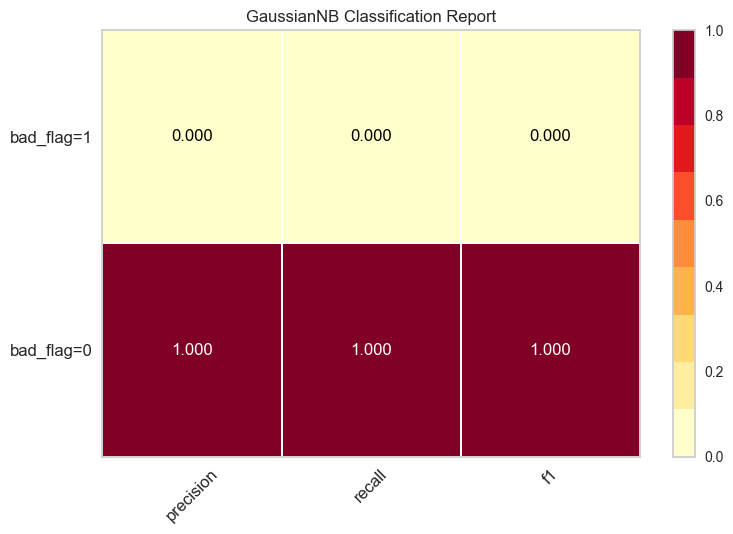

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [21]:

from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model, classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()